<a href="https://colab.research.google.com/github/glaubermateus/Ciencia_De_Dados/blob/main/2-regressao/1-expectativa_vida/Pratica_Regressao_Expectativa_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Inicio

In [ ]:
# Bibliotecas
from google.colab import files
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Escolha do arquivo
uploaded = files.upload()

In [ ]:
# Carregar os dados
df = pd.read_csv('/content/dataset.csv')

In [ ]:
# Dimensão
df.shape

(2938, 22)

In [ ]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Ajustando nome das colunas
df = pd.DataFrame({'country': df['Country'],
                       'life_expectancy': df['Life expectancy '],
                       'year': df['Year'],
                       'status': df['Status'],
                       'adult_mortality': df['Adult Mortality'],
                       'inf_death': df['infant deaths'],
                       'alcohol': df['Alcohol'],
                       'hepatitisB': df['Hepatitis B'],
                       'measles': df['Measles '],
                       'bmi': df[' BMI '],
                       'polio': df['Polio'],
                       'diphtheria': df['Diphtheria '],
                       'hiv': df[' HIV/AIDS'],
                       'gdp': df['GDP'],
                       'total_expenditure': df['Total expenditure'],
                       'thinness_till19': df[' thinness  1-19 years'],
                       'thinness_till9': df[' thinness 5-9 years'],
                       'school': df['Schooling'],
                       'population': df[' Population']})

In [ ]:
# Dimensão
df.shape

(2938, 19)

In [ ]:
# Visualiza 5 registros aleatorios
df.sample(5)

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
1399,Kuwait,74.0,2010,Developing,86.0,1,0.01,99.0,13,68.4,98.0,98.0,0.1,38497.61696,2.76,3.3,3.2,13.5,NaN
625,Costa Rica,79.6,2015,Developing,95.0,1,NaN,92.0,0,6.5,92.0,92.0,0.1,1146.36273,NaN,1.7,1.7,14.2,487852.0
33,Algeria,75.4,2014,Developing,11.0,21,0.01,95.0,0,58.4,95.0,95.0,0.1,547.85170,7.21,6.0,5.8,14.4,39113313.0
2252,Senegal,65.6,2012,Developing,2.0,20,0.28,91.0,46,22.7,83.0,91.0,0.4,136.45180,4.31,1.0,9.9,8.3,1373513.0
371,Brunei Darussalam,78.3,2012,Developing,79.0,0,0.01,99.0,1,38.2,99.0,99.0,0.1,47651.25990,2.30,5.8,5.3,14.4,NaN


In [ ]:
# Cria um dicionário com a descrição de cada variável
df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

## 2 - Analise Exploratoria

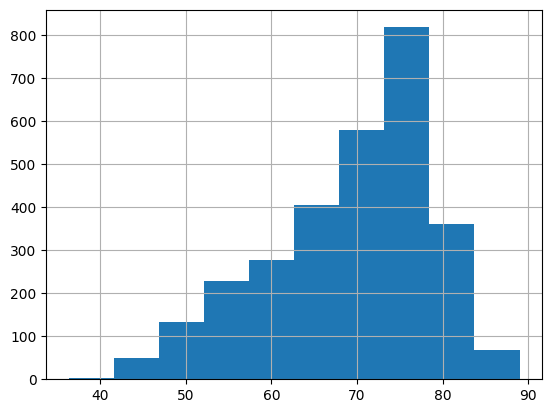

In [ ]:
# Visualizar o histograma da variavel alvo
df['life_expectancy'].hist();

O histograma da variável-alvo (expectativa de vida) mostra que a variável possui uma distribuição assimétrica a esquerda, indicando que a massa da distribuição se concentra no lado direito e a média é tipicamente menor que a mediana e a moda é maior que a mediana (Média < Mediana < Moda)

In [ ]:
# Resumo das variaveis categoricas
df.describe(include='object')

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [ ]:
# Resumo das variaveis numericas
df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [ ]:
# Função para o plot da relação da variável alvo com alguns atributos
def get_pairs(data, alvo, atributos, n):

    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [ ]:
# Definicao de variaveis
alvo = ['life_expectancy']
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

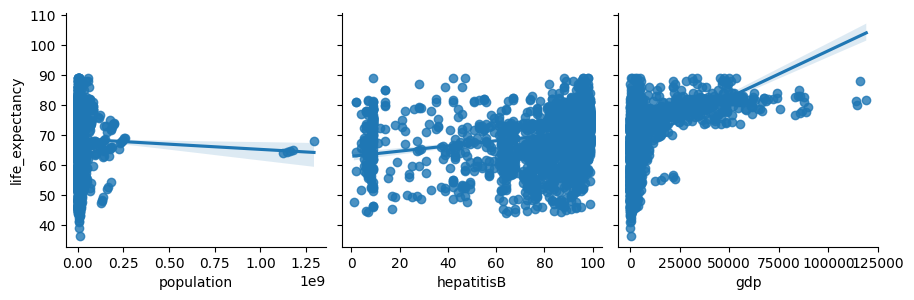

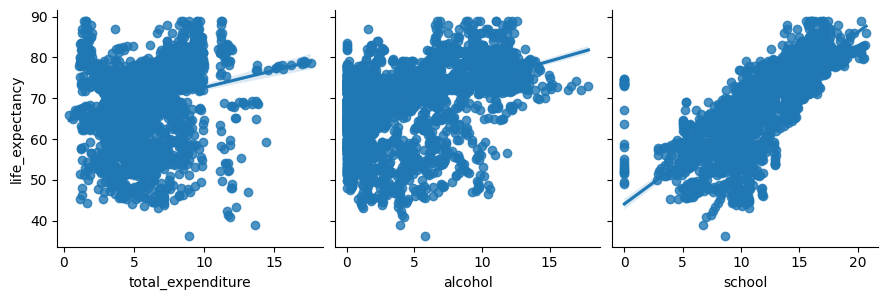

In [ ]:
# Chamando a função
get_pairs(df, alvo, atributos, 3)

### 2.1 Detecção de Valores Ausentes

In [ ]:
# Valores ausentes
valores_ausentes = df.isna().sum().sort_values(ascending=False)
valores_ausentes[valores_ausentes > 0]

,0
population,652
hepatitisB,553
gdp,448
total_expenditure,226
alcohol,194
school,163
bmi,34
thinness_till19,34
thinness_till9,34
diphtheria,19


In [ ]:
# Valores ausentes percentual
valores_ausentes_perc = valores_ausentes[valores_ausentes > 0] / df.shape[0] * 100
valores_ausentes_perc[valores_ausentes_perc > 0]

,0
population,22.191967
hepatitisB,18.822328
gdp,15.248468
total_expenditure,7.692308
alcohol,6.603131
school,5.547992
bmi,1.157250
thinness_till19,1.157250
thinness_till9,1.157250
diphtheria,0.646698


### 2.2 Detecção de Outliers

In [ ]:
# Variaveis com maiores percentuais de valores ausentes
atributos = valores_ausentes_perc[valores_ausentes_perc > 5].index.to_list()

In [ ]:
# Novo Dataframe com atributos com maiores percentuais de valores ausentes
novo_dataframe = df[atributos]

In [ ]:
# Identificando Outliers usando metodo IQR
q1 = novo_dataframe.quantile(0.25)
q3 = novo_dataframe.quantile(0.75)
iqr = q3 - q1
l_inf = q1 - 1.5 * iqr
l_sup = q3 + 1.5 * iqr

In [ ]:
# Definindo os outliers dentro do dataframe
outliers = ( (novo_dataframe < l_inf) | (novo_dataframe > l_sup) ).sum()

In [ ]:
# Outliers
outliers

,0
population,294
hepatitisB,254
gdp,365
total_expenditure,32
alcohol,0
school,44


In [ ]:
# Resumo dos outliers
outliers_resumo = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(novo_dataframe)) * 100})
outliers_resumo

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
alcohol,0,0.000000
school,44,1.497617


In [ ]:
# Outliers com percentual maior do que 0
outliers_resumo[outliers_resumo['Percentual'] > 0]

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


### 2.3 Tratamento de Outliers

In [ ]:
# Cria novo dataframe excluindo os outliers
df_sem_outliers = df[~((novo_dataframe < l_inf) | (novo_dataframe > l_sup)).any(axis = 1)]

In [ ]:
# Dimensão
df_sem_outliers.shape

(2044, 19)

In [ ]:
# Registros excluidos
print(f'Com a remoção dos outliers foram excluídos {df.shape[0] - df_sem_outliers.shape[0]} registros')

Com a remoção dos outliers foram excluídos 894 registros


In [ ]:
# Resumo estatistico
df_sem_outliers.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


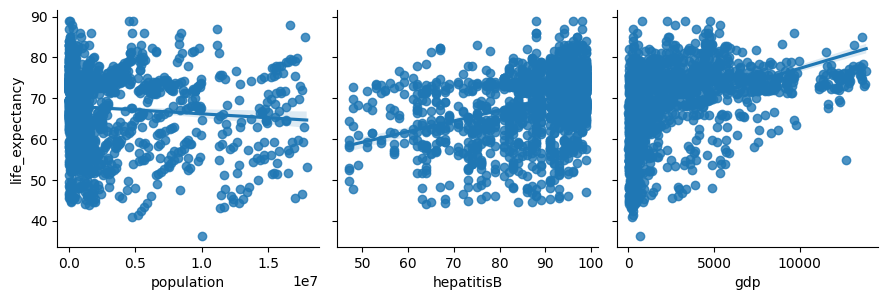

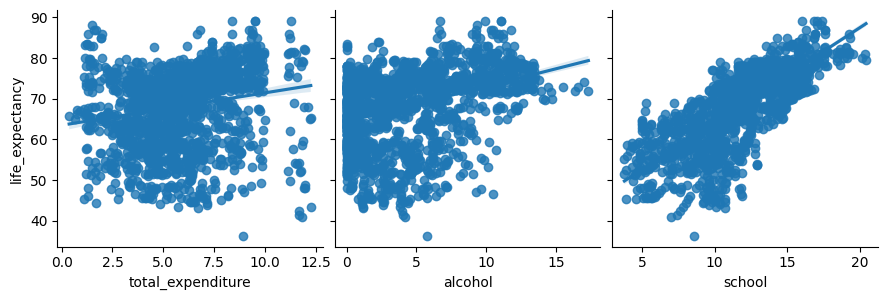

In [ ]:
# Verificando a relação da variavel alvo em relação aos atributos do dataframe sem outliers
get_pairs(df_sem_outliers, alvo, atributos, 3)

### 2.4 Tratamento de Valores Ausentes

In [ ]:
# Filtrando valores ausentes
valores_ausentes = df_sem_outliers.isna().sum().sort_values(ascending=False)
valores_ausentes[valores_ausentes > 0]

,0
population,494
hepatitisB,391
gdp,376
total_expenditure,161
alcohol,136
school,134
bmi,12
thinness_till19,12
thinness_till9,12
life_expectancy,8


In [ ]:
# Verificando percentual de valores ausentes
valores_ausentes_perc = valores_ausentes[valores_ausentes > 0] / df_sem_outliers.shape[0] * 100
valores_ausentes_perc

,0
population,24.168297
hepatitisB,19.129159
gdp,18.395303
total_expenditure,7.876712
alcohol,6.653620
school,6.555773
bmi,0.587084
thinness_till19,0.587084
thinness_till9,0.587084
life_expectancy,0.391389


In [ ]:
# Função para inputar dados com a mediana
def imputar_mediana(dados):
  return dados.fillna(dados.median())

In [ ]:
# Remover valores ausentes dos atributos com maior percentual
df_sem_outliers.loc[:, 'population'] = df_sem_outliers['population'].transform(imputar_mediana)
df_sem_outliers.hepatitisB = df_sem_outliers['hepatitisB'].transform(imputar_mediana)
df_sem_outliers.alcohol = df_sem_outliers['alcohol'].transform(imputar_mediana)
df_sem_outliers.total_expenditure = df_sem_outliers['total_expenditure'].transform(imputar_mediana)
df_sem_outliers.gdp = df_sem_outliers['gdp'].transform(imputar_mediana)
df_sem_outliers.school = df_sem_outliers['school'].transform(imputar_mediana)

In [ ]:
# Valores ausentes
valores_ausentes = df_sem_outliers.isna().sum().sort_values(ascending=False)
valores_ausentes[valores_ausentes > 0]

,0
thinness_till19,12
thinness_till9,12
bmi,12
life_expectancy,8
adult_mortality,8
polio,3
diphtheria,3


In [ ]:
# Valores ausentes percentual
valores_ausentes_perc = valores_ausentes[valores_ausentes > 0] / df_sem_outliers.shape[0] * 100
valores_ausentes_perc

,0
thinness_till19,0.587084
thinness_till9,0.587084
bmi,0.587084
life_expectancy,0.391389
adult_mortality,0.391389
polio,0.146771
diphtheria,0.146771


In [ ]:
# Remover os registros dos outros atributs com valores missing
df_sem_outliers = df_sem_outliers.dropna()

In [ ]:
# Valores ausentes
df_sem_outliers.isna().sum()

,0
country,0
life_expectancy,0
year,0
status,0
adult_mortality,0
inf_death,0
alcohol,0
hepatitisB,0
measles,0
bmi,0


In [ ]:
# Dimensão
df_sem_outliers.shape

(2023, 19)

In [ ]:
# Informações gerais
df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2023 non-null   object 
 1   life_expectancy    2023 non-null   float64
 2   year               2023 non-null   int64  
 3   status             2023 non-null   object 
 4   adult_mortality    2023 non-null   float64
 5   inf_death          2023 non-null   int64  
 6   alcohol            2023 non-null   float64
 7   hepatitisB         2023 non-null   float64
 8   measles            2023 non-null   int64  
 9   bmi                2023 non-null   float64
 10  polio              2023 non-null   float64
 11  diphtheria         2023 non-null   float64
 12  hiv                2023 non-null   float64
 13  gdp                2023 non-null   float64
 14  total_expenditure  2023 non-null   float64
 15  thinness_till19    2023 non-null   float64
 16  thinness_till9     2023 non-n

In [ ]:
# Drop de country e status (não iremos usar no dataframe)
df_sem_outliers = df_sem_outliers.drop(['country', 'status'], axis=1)

## 3 - Engenharia de Atributos

In [ ]:
# Nova variável (lifestyle)
df_sem_outliers['lifestyle'] = df_sem_outliers['bmi'] * df_sem_outliers['alcohol']

## 4 - Análise de Correlação para checar Multicolinearidade

In [ ]:
# Matriz de Correlação
df_corr = df_sem_outliers.corr()

In [ ]:
# Função para filtrar e visualizar correlação
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = df.corr()

    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')

    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column,
                                       errors = 'ignore').drop(columns = drop_column,
                                                               errors = 'ignore')

    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

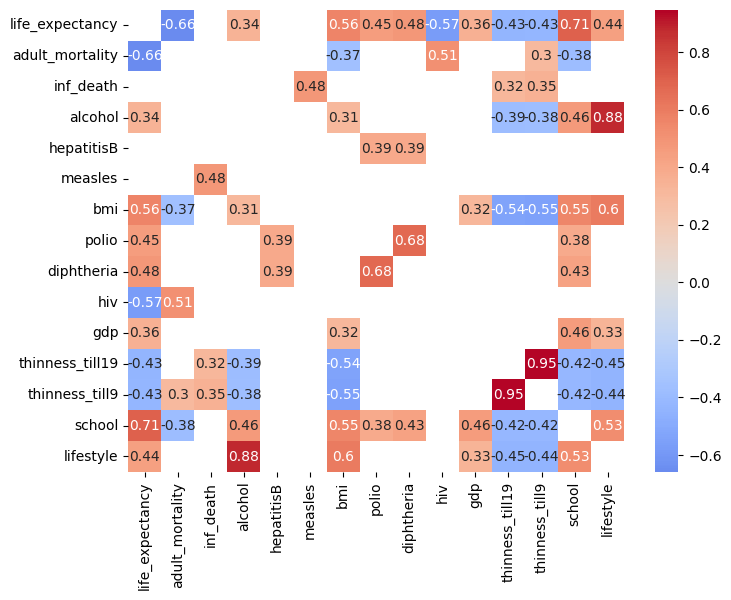

In [ ]:
filtrar_e_visualizar_correlacao(df_sem_outliers, threshold = 0.3, drop_column=None)

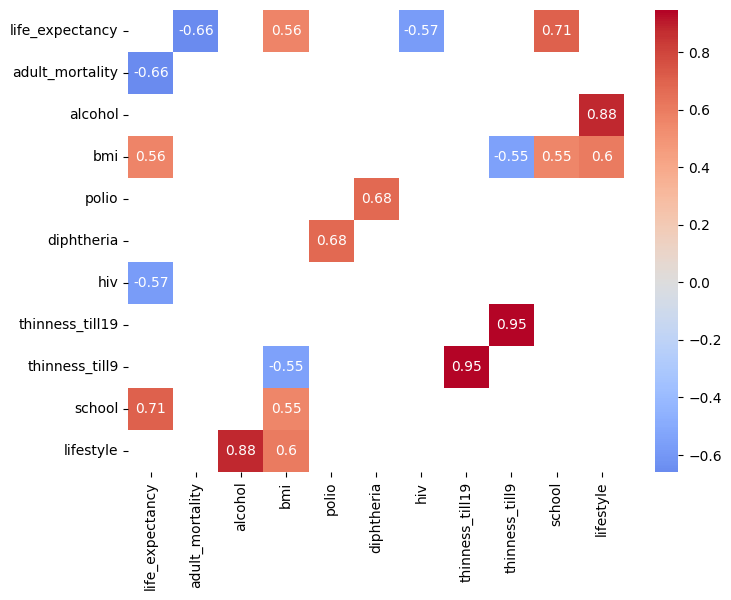

In [ ]:
filtrar_e_visualizar_correlacao(df_sem_outliers, threshold = 0.55, drop_column=None)

In [ ]:
# Preparando o dataset
df_final = pd.DataFrame({'life_expectancy': df_sem_outliers['life_expectancy'],
                              'adult_mortality': df_sem_outliers['adult_mortality'],
                              'diphtheria': df_sem_outliers['diphtheria'],
                              'hiv': df_sem_outliers['hiv'],
                              'gdp': df_sem_outliers['gdp'],
                              'thinness_till19': df_sem_outliers['thinness_till19'],
                              'school': df_sem_outliers['school'],
                              'lifestyle': df_sem_outliers['lifestyle']})

In [ ]:
# Valores ausentes
df_final.isna().sum()

,0
life_expectancy,0
adult_mortality,0
diphtheria,0
hiv,0
gdp,0
thinness_till19,0
school,0
lifestyle,0


## 5 - Usando Machine Learning para Identificar os Atributos mais relevantes

In [ ]:
# Separando as variaveis
X = df_final.drop('life_expectancy', axis=1)
y = df_final['life_expectancy']

In [ ]:
# Dividindo os dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criando e treinando o Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predições com conjunto de teste
y_pred = rf.predict(X_test)

In [ ]:
# Avaliando o modelo
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
# Apresentando as metricas
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MSE: 4.009466893827165
RMSE: 2.0023653247664783
R2: 0.9535079541206163


In [ ]:
# Identificando as variaveis mais importantes
importancias = rf.feature_importances_
variaveis = X.columns

In [ ]:
# Dataframe com essas variaveis
importancias_df = pd.DataFrame({'Variavel': variaveis, 'Importancia': importancias}).sort_values(by='Importancia', ascending=False)

In [ ]:
# Visualizando o dataframe
importancias_df

,Variavel,Importancia
2,hiv,0.607101
0,adult_mortality,0.224181
5,school,0.073162
4,thinness_till19,0.037829
6,lifestyle,0.031248
1,diphtheria,0.017064
3,gdp,0.009415


In [ ]:
# Identificando atributos com menos de 1% de importancia
atributos_menos_relevante = importancias_df[importancias_df['Importancia'] < 0.01]
atributos_menos_relevante = atributos_menos_relevante.loc[:,'Variavel'].to_list()
print(atributos_menos_relevante)

['gdp']


In [ ]:
# Remover as variaveis com menos de 1% de importancia
novo_df_final = df_final.drop(atributos_menos_relevante, axis = 1)

In [ ]:
# Dimensão
novo_df_final.shape

(2023, 7)

In [ ]:
# Colunas novo dataframe
novo_df_final.columns

Index(['life_expectancy', 'adult_mortality', 'diphtheria', 'hiv',
       'thinness_till19', 'school', 'lifestyle'],
      dtype='object')

## 6 - Pre Processamento

In [ ]:
# Split dos dados em X e y
X = novo_df_final[['adult_mortality', 'diphtheria', 'hiv','thinness_till19', 'school', 'lifestyle']].values
y = novo_df_final['life_expectancy'].values.reshape(-1, 1)

In [ ]:
# Split dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Dimensão dos dados
print('Shape dos preditores de treino: ', X_train.shape)
print('Shape dos preditores de teste: ', X_test.shape)
print('Shape do alvo de treino: ', y_train.shape)
print('Shape do alvo de teste: ', y_test.shape)

(1618, 6)
(405, 6)
(1618, 1)
(405, 1)


In [ ]:
# Padronizador
sc = StandardScaler()

In [ ]:
# Fit apenas com dados de treino
sc.fit(X_train)

StandardScaler()

In [ ]:
# Aplica o padronizador nos dados de treino e teste
x_train_sc = sc.transform(X_train)
x_test_sc = sc.transform(X_test)

## 7 - Modelagem Preditiva

### 7.1 Versão 1 do Modelo

In [ ]:
# Versão 1 do Modelo
modelo_v1 = LinearRegression()

In [ ]:
# Treinamento do modelo
modelo_v1.fit(x_train_sc, y_train)

LinearRegression()

In [ ]:
# Coeficientes
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [[-2.55990637  1.65310184 -2.60945231 -0.50572504  3.69012812  0.51432364]]


In [ ]:
# Previsoes com dados de treino
y_pred_train_v1 = modelo_v1.predict(x_train_sc)

In [ ]:
# Identificando as Metricas
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train_v1))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train_v1))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v1)))
print('R2 Score: ', metrics.r2_score(y_train, y_pred_train_v1))

Mean Absolute Error:  3.2946474021136094
Mean Squared Error:  19.41256033555363
Root Mean Squared Error:  4.405968717042103
R2 Score:  0.7690571526327722


In [ ]:
# Previsoes
y_pred_test_v1 = modelo_v1.predict(x_test_sc)

In [ ]:
# Dataframe com as previsoes
df_previsoes = pd.DataFrame({'Valor Real': y_test.flatten(), 'Previsoes': y_pred_test_v1.flatten()})

In [ ]:
# Visualizando o dataframe
df_previsoes.head()

,Valor Real,Previsoes
0,56.8,57.628509
1,72.7,75.063364
2,62.3,61.993642
3,63.9,70.469820
4,69.4,70.268508


In [ ]:
# Print das Metricas de teste
# Identificando as Metricas
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test_v1))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test_v1))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v1)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred_test_v1))

Mean Absolute Error:  3.266189451721546
Mean Squared Error:  17.857320129264732
Root Mean Squared Error:  4.225792248710854
R2 Score:  0.7895014895328251


### 7.2 Versão 2 do Modelo - Regressão Lasso

In [ ]:
# Modelo v2
modelo_v2 = Lasso(alpha = 1.0)

In [ ]:
# Treino do modelo
modelo_v2.fit(x_train_sc, y_train)

Lasso()

In [ ]:
# Previsoes com dados de treino
y_pred_train_v2 = modelo_v2.predict(x_train_sc)

In [ ]:
# Metricas de Treino
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train_v2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train_v2))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v2)))
print('R2 Score: ', metrics.r2_score(y_train, y_pred_train_v2))

Mean Absolute Error:  3.5248350517175187
Mean Squared Error:  21.86575936297798
Root Mean Squared Error:  4.676083763468954
R2 Score:  0.7398725031708322


In [ ]:
# Previsoes com dados de teste
y_pred_test_v2 = modelo_v2.predict(x_test_sc)

In [ ]:
# Metricas de Teste
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test_v2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test_v2))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v2)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred_test_v2))

Mean Absolute Error:  3.562008211692147
Mean Squared Error:  21.237066084741404
Root Mean Squared Error:  4.608369135034802
R2 Score:  0.7496617216261391


### 7.3 Versão 3 do Modelo - Regressão Ridge

In [ ]:
# Modelo v3
modelo_v3 = Ridge(alpha = 1.0)

In [ ]:
# Treino do modelo
modelo_v3.fit(x_train_sc, y_train)

Ridge()

In [ ]:
# Previsoes com dados de treino
y_pred_train_v3 = modelo_v3.predict(x_train_sc)

In [ ]:
# Metricas de Treino
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train_v3))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train_v3))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v3)))
print('R2 Score: ', metrics.r2_score(y_train, y_pred_train_v3))

Mean Absolute Error:  3.2947409386562514
Mean Squared Error:  19.41256839691876
Root Mean Squared Error:  4.405969631865245
R2 Score:  0.7690570567301923


In [ ]:
# Previsoes com dados de teste
y_pred_test_v3 = modelo_v3.predict(x_test_sc)

In [ ]:
# Metricas de Teste
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test_v3))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test_v3))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v3)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred_test_v3))

Mean Absolute Error:  3.2662971013103377
Mean Squared Error:  17.85792984451091
Root Mean Squared Error:  4.225864390217806
R2 Score:  0.7894943023317108


### 7.4 - Versão 4 do Modelo - Elastic Net

In [ ]:
# Modelo
modelo_v4 = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [ ]:
# Treina
modelo_v4.fit(x_train_sc, y_train)

ElasticNet()

In [ ]:
# Previsoes com dados de treino
y_pred_train_v4 = modelo_v4.predict(x_train_sc)

In [ ]:
# Metricas de Treino
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train_v4))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train_v4))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v4)))
print('R2 Score: ', metrics.r2_score(y_train, y_pred_train_v4))

Mean Absolute Error:  3.7600855345695896
Mean Squared Error:  23.78071112396605
Root Mean Squared Error:  4.876547049292773
R2 Score:  0.7170911490058427


In [ ]:
# Previsoes com dados de teste
y_pred_test_v4 = modelo_v4.predict(x_test_sc)

In [ ]:
# Metricas de Teste
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test_v4))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test_v4))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v4)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred_test_v4))

Mean Absolute Error:  3.789206072071763
Mean Squared Error:  23.21618413300866
Root Mean Squared Error:  4.818317562490943
R2 Score:  0.726332274755988


### 7.5 - Versão 5 do Modelo - Ridge com otimização de hiperparâmetros

In [ ]:
# Cria o modelo
modelo_v5 = Ridge()

In [ ]:
# Definição dos parametros
parametros = {'alpha':[0.01, 0.1, 1, 10, 100]}

In [ ]:
# Configurando o Grid Search CV
gs = GridSearchCV(estimator=modelo_v5, param_grid=parametros, cv = 5, scoring = 'neg_mean_squared_error', verbose = 1)

In [ ]:
# Treinamento do modelo
gs.fit(x_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Melhor modelo
melhor_modelo = gs.best_estimator_

In [ ]:
# Previsoes com dados de treino
y_pred_train_v5 = melhor_modelo.predict(x_train_sc)

In [ ]:
# Metricas de treino
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train_v5))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train_v5))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v5)))
print('R2 Score: ', metrics.r2_score(y_train, y_pred_train_v5))

Mean Absolute Error:  3.2957475376842535
Mean Squared Error:  19.41335480629512
Root Mean Squared Error:  4.406058874583398
R2 Score:  0.7690477011574377


In [ ]:
# Previsoes
y_pred_test_v5 = melhor_modelo.predict(x_test_sc)

In [ ]:
# Metricas de Teste
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test_v5))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test_v5))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred_test_v5))

Mean Absolute Error:  3.2672750615943604
Mean Squared Error:  17.864221536665905
Root Mean Squared Error:  4.226608751311849
R2 Score:  0.7894201371256577


In [ ]:
# Melhor hiperparametro
print('Melhor valor de alpha: ', gs.best_params_['alpha'])

Melhor valor de alpha:  10


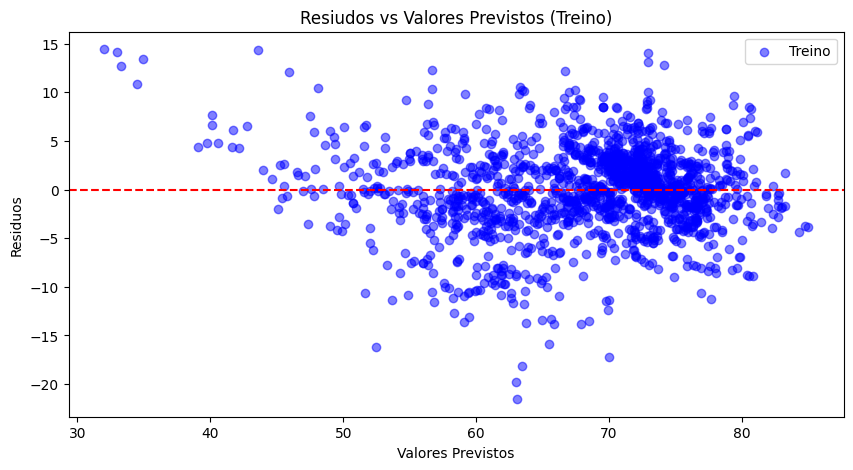

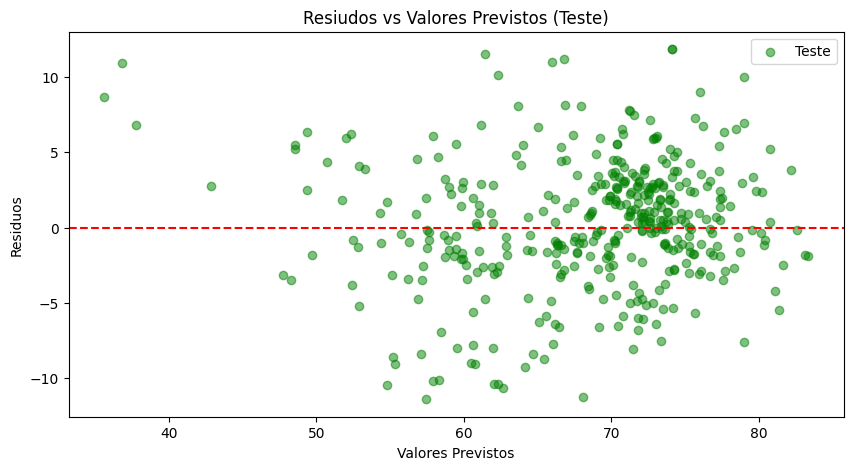

In [ ]:
# Melhor modelo conforme as metricas de teste foi o modelo V1

# Calcular os residuos de treino
residuos_treino = y_train - y_pred_train_v1
# Calcular os residuos de teste
residuos_teste = y_test - y_pred_test_v1

# Plotar o grafico de residuos vs treino
plt.figure(figsize = (10,5))
plt.scatter(y_pred_train_v1, residuos_treino, color = 'blue', label = 'Treino', alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Residuos')
plt.title('Resiudos vs Valores Previstos (Treino)')
plt.legend()
plt.show()
# Plotar o grafico de residuos vs teste
plt.figure(figsize = (10,5))
plt.scatter(y_pred_test_v1, residuos_teste, color = 'green', label = 'Teste', alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Residuos')
plt.title('Resiudos vs Valores Previstos (Teste)')
plt.legend()
plt.show()